# 可视化探索adult数据集

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. 读入数据

In [2]:
column_list = ['age', 'job_catagory', 'final_weight',
              'education', 'education_time', 'marry', 'job',
              'family', 'race', 'gender', 'in', 'out',
              'work_time', 'country', 'salary']
df = pd.read_csv("adult.csv",names=column_list)
print(df[:10])

   age       job_catagory  final_weight      education  education_time  \
0   25            Private        226802           11th               7   
1   38            Private         89814        HS-grad               9   
2   28          Local-gov        336951     Assoc-acdm              12   
3   44            Private        160323   Some-college              10   
4   18                  ?        103497   Some-college              10   
5   34            Private        198693           10th               6   
6   29                  ?        227026        HS-grad               9   
7   63   Self-emp-not-inc        104626    Prof-school              15   
8   24            Private        369667   Some-college              10   
9   55            Private        104996        7th-8th               4   

                 marry                 job          family    race   gender  \
0        Never-married   Machine-op-inspct       Own-child   Black     Male   
1   Married-civ-spouse     

## 2. 分析数据并绘图

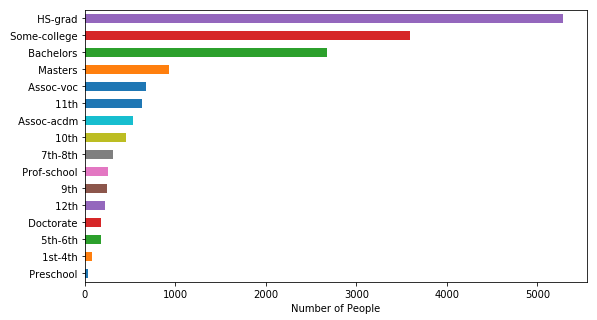

In [34]:
# 统计教育情况
s = df['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis.pdf')
plt.show()

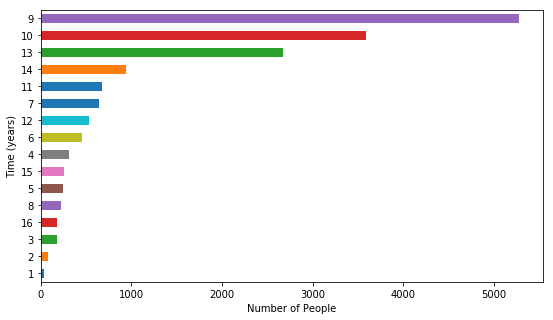

In [4]:
# 统计教育时间
s = df['education_time']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.ylabel('Time (years)')
plt.xlabel('Number of People')
plt.savefig('report/img/education_time.pdf')
plt.show()

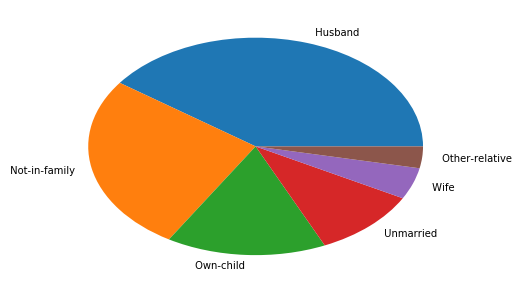

In [39]:
# 统计家庭情况
s = df['family']
fig = s.value_counts().plot(kind='pie', label='', figsize=(7.5, 5))
plt.savefig('report/img/family_dis.pdf')
plt.show()

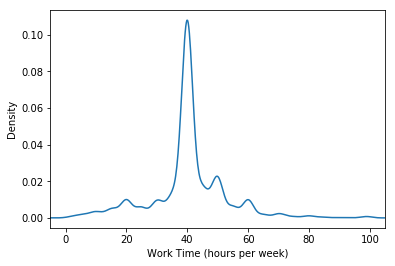

In [46]:
# 统计工作时间
s = df['work_time']
fig = s.plot(kind='kde', label='')
plt.xlim((-5, 105))
plt.xlabel('Work Time (hours per week)')
plt.savefig('report/img/worktime_dis.pdf')
plt.show()

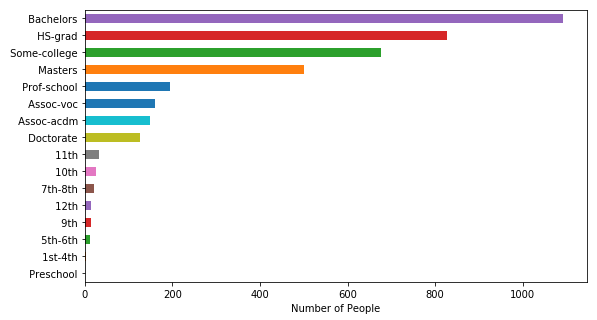

In [4]:
# 收入>50K的教育程度分布
df1 = df.loc[df['salary'] == ' >50K.', ['education']]
s = df1['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis_more50k.pdf')
plt.show()

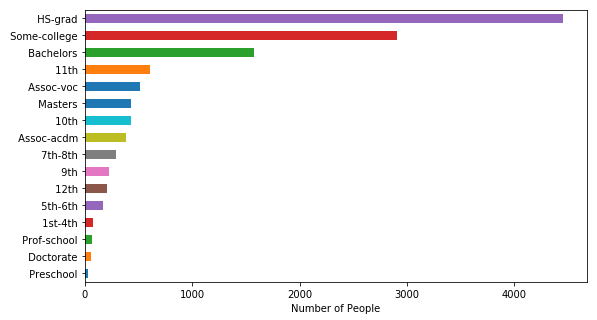

In [7]:
# 收入<=50K的教育程度分布
df1 = df.loc[df['salary'] == ' <=50K.', ['education']]
s = df1['education']
fig = s.value_counts(ascending=True).plot(kind='barh', figsize=(9, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/education_dis_less50k.pdf')
plt.show()

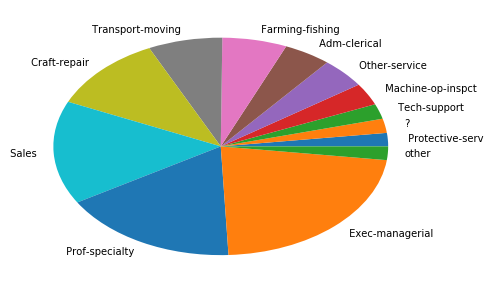

In [44]:
# 每周工作时间>50小时的工作分布
df1 = df.loc[df['work_time'] >= 50, ['job']]
s = df1['job'].value_counts(ascending=True)
# print(s)
s1 = s[:3]
s2 = s[3:]
s = s2.append(pd.Series([s1[0] + s1[1] + s1[2]], index=['other']))
fig = s.plot(kind='pie', label='', figsize=(7.5, 5))
plt.savefig('report/img/job_dis.pdf')
plt.show()

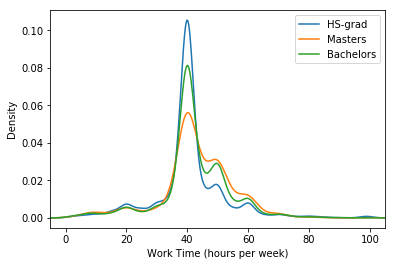

In [45]:
# HS-grad和Master的工作时间比较
l1 = df.loc[df['education'] == ' HS-grad', ['work_time']]['work_time']
l2 = df.loc[df['education'] == ' Masters', ['work_time']]['work_time']
l3 = df.loc[df['education'] == ' Bachelors', ['work_time']]['work_time']

plt.xlim((-5, 105))
plt.xlabel('Work Time (hours per week)')
ax1 = l1.plot(kind='kde', label='HS-grad')
ax2 = l2.plot(kind='kde', label='Masters')
ax3 = l3.plot(kind='kde', label='Bachelors')
plt.legend()
plt.savefig('report/img/work_time_com1.pdf')
plt.show()

## 画附录图

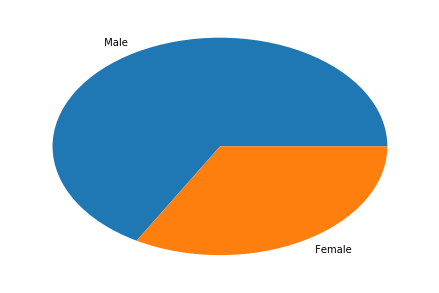

In [3]:
# 统计性别情况
s = df['gender']
fig = s.value_counts().plot(kind='pie', label='', figsize=(7.5, 5))
plt.savefig('report/img/app_gender.pdf')
plt.show()

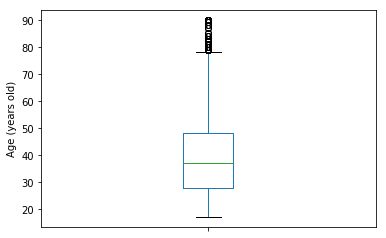

In [38]:
# 统计年龄情况
s = df['age']
fig = s.plot(kind='box', label='')
#plt.xlim((5, 95))
plt.ylabel('Age (years old)')
plt.savefig('report/img/app_age.pdf')
plt.show()

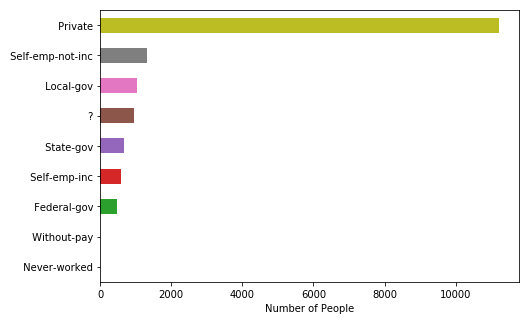

In [18]:
# 统计工作类别
s = df['job_catagory']
fig = s.value_counts(ascending=True).plot(kind='barh', label='', figsize=(7.5, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/app_job_cat.pdf')
plt.show()

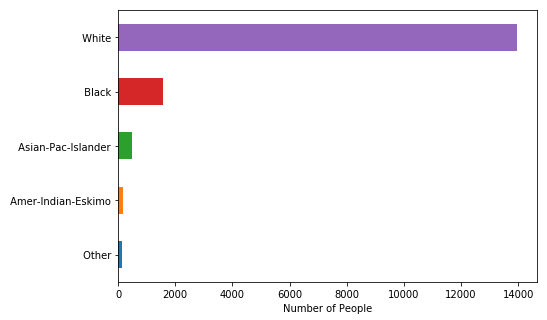

In [41]:
# 统计种族情况
s = df['race']
fig = s.value_counts(ascending=True).plot(kind='barh', label='', figsize=(7.5, 5))
plt.xlabel('Number of People')
plt.savefig('report/img/app_race.pdf')
plt.show()

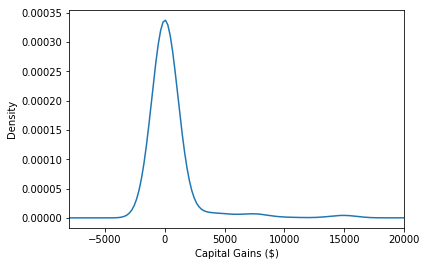

In [50]:
# 统计资本收益
s = df['in']
fig = s.plot(kind='kde', label='')
plt.xlim((-8000, 20000))
plt.xlabel('Capital Gains ($)')
plt.savefig('report/img/app_in.pdf')
plt.show()

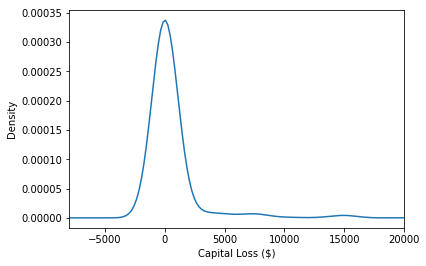

In [49]:
# 统计资本亏损
s = df['in']
fig = s.plot(kind='kde', label='')
plt.xlim((-8000, 20000))
plt.xlabel('Capital Loss ($)')
plt.savefig('report/img/app_out.pdf')
plt.show()